# Customizing Legends and Colorbars

This notebook covers how to customize plot legends and colorbars to make your visualizations more informative.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

## Customizing Plot Legends

We've seen how to create a simple legend with `ax.legend()`. Now let's look at how to customize it.

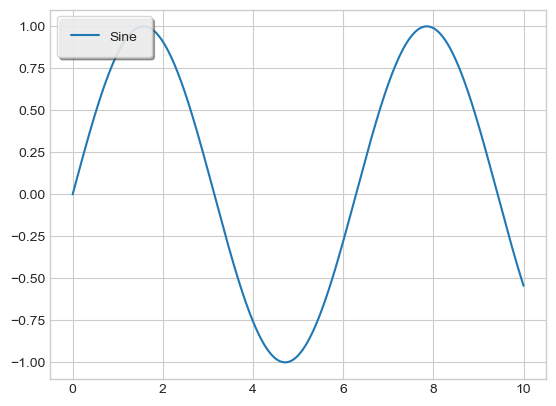

In [2]:
# Create some data
x = np.linspace(0, 10, 1000)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label='Sine')

# Customize the legend
ax.legend(loc='upper left', frameon=True, ncol=1, fancybox=True, framealpha=0.8, shadow=True, borderpad=1)
plt.show()

### Choosing Elements for the Legend
Sometimes you want to show only specific elements in the legend. You can do this by passing handles and labels to `ax.legend()`.

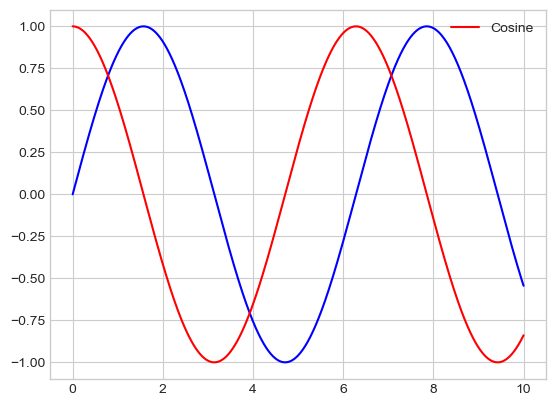

In [3]:
# Plot some data but only create a legend for some of it
y_cos = np.cos(x)

fig, ax = plt.subplots()
line1, = ax.plot(x, y, color='blue', label='Sine - not in legend')
line2, = ax.plot(x, y_cos, color='red', label='Cosine')

# Create a legend for the second line only
ax.legend(handles=[line2])
plt.show()

### Legend for Size of Points
For scatter plots, you might want a legend that indicates the scale of the point sizes. The trick is to plot empty lists with the desired sizes and labels.

/var/folders/s0/zq5m1f7578s12jw_8klt90dm0000gn/T/ipykernel_17765/683188814.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x, y, s=sizes, alpha=0.3, cmap='viridis')


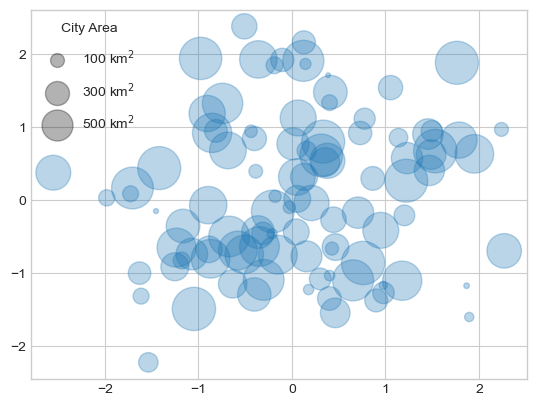

In [4]:
# Create some scatter data
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
sizes = 1000 * rng.rand(100)

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=sizes, alpha=0.3, cmap='viridis')

# Create the legend for sizes
for area in [100, 300, 500]:
    ax.scatter([], [], s=area, c='k', alpha=0.3,
               label=str(area) + ' km$^2$')
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.show()

## Customizing Colorbars

A colorbar is a key component for plots that use color to represent a third dimension of data.

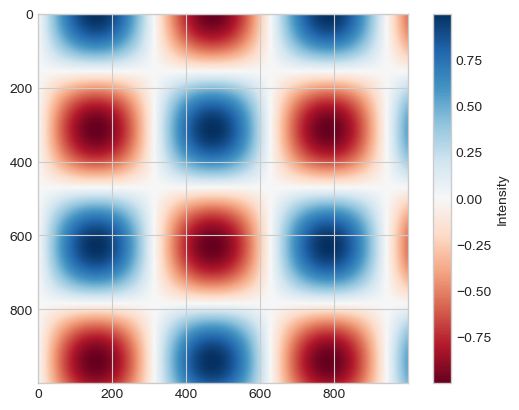

In [5]:
# Create some 2D data
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

fig, ax = plt.subplots()
img = ax.imshow(I, cmap='RdBu')

# Customize the colorbar
cbar = fig.colorbar(img, orientation='vertical')
cbar.set_label('Intensity')
plt.show()

## Example: Handwritten Digits

Let's use these ideas to visualize the handwritten digits dataset from Scikit-Learn.

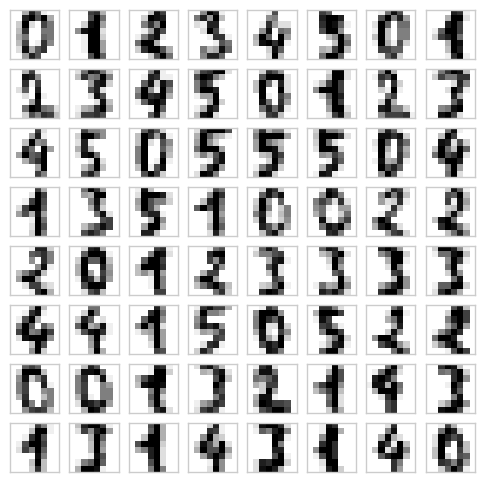

In [6]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

# Plot some of the digits
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

We can project the digits into 2D using a manifold learning algorithm like IsoMap.

/opt/miniconda3/envs/general/lib/python3.13/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/miniconda3/envs/general/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/var/folders/s0/zq5m1f7578s12jw_8klt90dm0000gn/T/ipykernel_17765/3961077030.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))


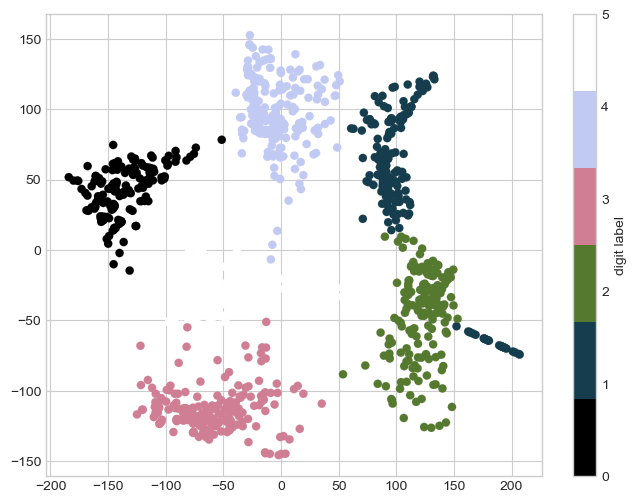

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# Plot the projected data, using a discrete colormap for the labels
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(projection[:, 0], projection[:, 1], lw=0.1,
                     c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))

# Add a colorbar for the discrete classes
cbar = fig.colorbar(scatter, ticks=range(6))
cbar.set_label('digit label')
plt.show()